In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import missingno as msno
import hvplot.pandas

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [3]:
df_path = Path("Resources/heart_2022_with_nans.csv")

In [4]:
df = pd.read_csv(df_path)
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


<Axes: >

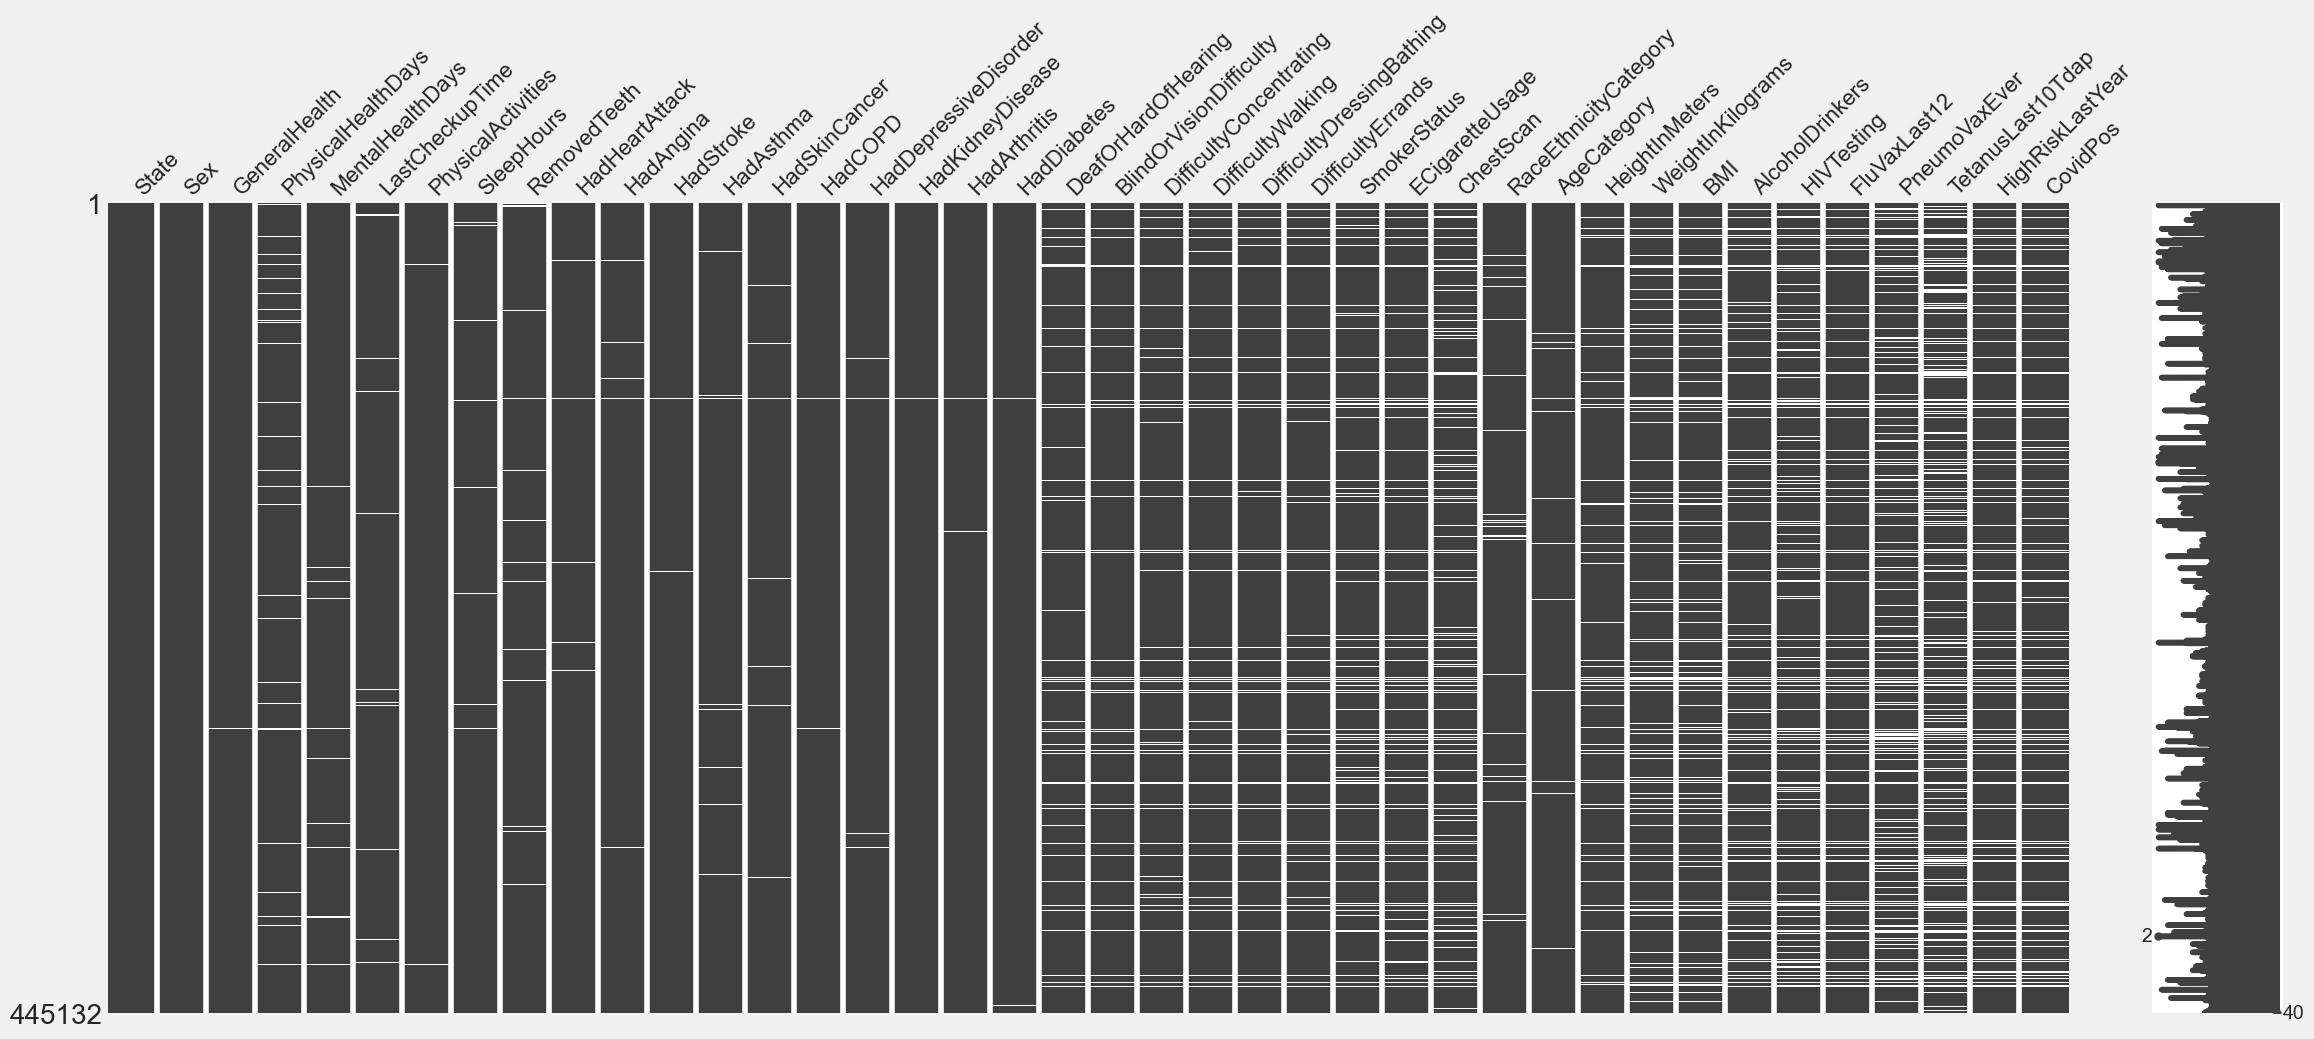

In [5]:
msno.matrix(df)

In [6]:
# Finding NAN values
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values_percentage = (nan_values/df.shape[0])*100

# Output the DataFrame with two columns nan_values and nan_values_percentage
pd.concat([nan_values, nan_values_percentage], axis=1).rename(columns= {0:"NaN Values", 1:"(%) of NaN Values"}).round(2)

,NaN Values,(%) of NaN Values
TetanusLast10Tdap,82516,18.54
PneumoVaxEver,77040,17.31
HIVTesting,66127,14.86
ChestScan,56046,12.59
CovidPos,50764,11.40
HighRiskLastYear,50623,11.37
BMI,48806,10.96
FluVaxLast12,47121,10.59
AlcoholDrinkers,46574,10.46
WeightInKilograms,42078,9.45


In [7]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [8]:
columns_to_drop = [
    'TetanusLast10Tdap', 'PneumoVaxEver', 'HIVTesting', 
]
dropped_df = df.drop(columns=columns_to_drop)
dropped_df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,FluVaxLast12,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,Yes,No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,Yes,No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Virgin Islands,Female,Good,0.0,3.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,Yes,"Black only, Non-Hispanic",Age 18 to 24,1.65,69.85,25.63,NaN,No,No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,No,"Black only, Non-Hispanic",Age 50 to 54,1.70,83.01,28.66,No,Yes,No,No
445129,Virgin Islands,Female,Poor,30.0,30.0,5 or more years ago,No,5.0,1 to 5,No,...,NaN,NaN,Age 65 to 69,1.70,49.90,17.23,NaN,No,No,No
445130,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,Yes,"Black only, Non-Hispanic",Age 70 to 74,1.83,108.86,32.55,No,Yes,No,Yes
